# **This project is a simulated version inspired by a real scrap prediction model I developed as part of my role at Murata Electronics. All data is generated and does not represent actual production values.**

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt


# Test with linear regression initially

In [5]:
data = pd.read_excel("/content/Sn thickness data .xlsx")
data.head()


,Lot Number,Bath Temp,Barrel Current,Core Weight,Sn Thickness,Status
0,ID4500001,36.2,372,1952,14.5,OK
1,ID4500002,37.8,385,1987,18.2,OK
2,ID4500003,35.5,367,1923,11.7,NG
3,ID4500004,38.9,398,1995,19.8,OK
4,ID4500005,39.2,352,1911,21.3,NG


In [6]:
data = data.drop(["Lot Number" , "Status"] , axis =1)


In [7]:
data.head()

,Bath Temp,Barrel Current,Core Weight,Sn Thickness
0,36.2,372,1952,14.5
1,37.8,385,1987,18.2
2,35.5,367,1923,11.7
3,38.9,398,1995,19.8
4,39.2,352,1911,21.3


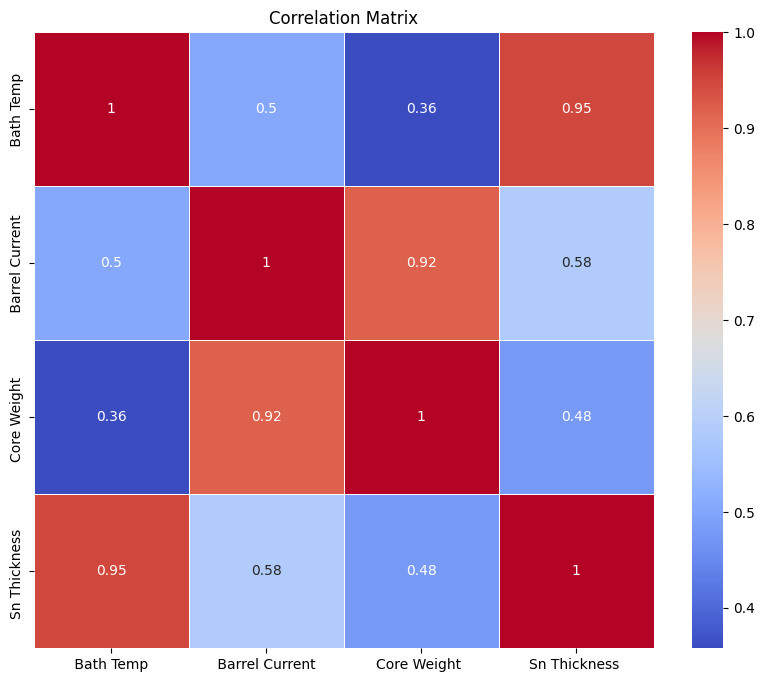

In [8]:
correlation_matrix = data.corr()
correlation_matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Bath temperature shows the highest correlation value to the Sn thickness.

In [9]:
print(data.columns)

Index([' Bath Temp ', ' Barrel Current ', 'Core Weight ', 'Sn Thickness '], dtype='object')


In [10]:
X = data[[" Bath Temp "]]
y = data["Sn Thickness "]

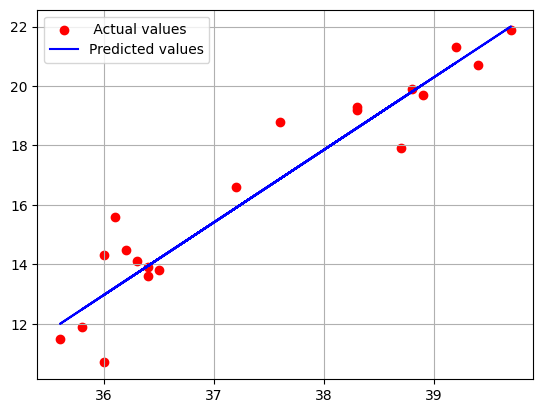

the RMSE = 1.078424777163433 and the R-square = 0.899572124777854


In [11]:
Xtrain , Xtest , ytrain , ytest = train_test_split(X , y , test_size = 0.2 , random_state = 42)
model = LinearRegression()
model.fit(Xtrain , ytrain)
y_prediction = model.predict(Xtest)

plt.scatter(Xtest , ytest , color = "red" , label = " Actual values")
plt.plot(Xtest , y_prediction , color = "blue" , label = "Predicted values")
plt.grid()
plt.legend()
plt.show()

# The model shows its a linear graph , as X increase , y also tend to increase ,

RMSE = np.sqrt(round(mean_squared_error(ytest , y_prediction),3))
#print(round(RMSE,))

R_square = r2_score(ytest , y_prediction)
#print(round(R_square, ))

print(f"the RMSE = {RMSE} and the R-square = {R_square}")

# Conclusion :
# RMSE indicates the average error between predicted and actual Sn thickness is approximately 1.08 μm, which is low relative to the range of thickness values.
# The R² score of 0.90 suggests that the model using only Bath Temperature explains 90% of the variance in Sn thickness — a strong linear relationship.
# This confirms that bath temperature is a significant factor influencing tin plating thickness in this simulated process.


# Test with Random Forest Regressor

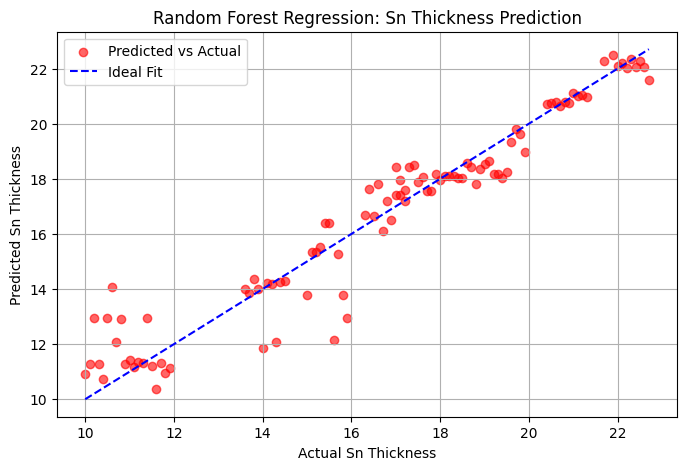

1.0073552672296013
0.9249057804498527


In [14]:
# K-fold cross valaidation is used instead train test split
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
y_pred_cv = cross_val_predict(model, X, y, cv=kfold)
# Cross-validated scores
r2_scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')
rmse_scores = np.sqrt(-cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error'))



plt.figure(figsize=(8,5))
plt.scatter(y, y_pred_cv, color="red", alpha=0.6, label="Predicted vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'blue', linestyle='--', label="Ideal Fit")
plt.xlabel("Actual Sn Thickness")
plt.ylabel("Predicted Sn Thickness")
plt.title("Random Forest Regression: Sn Thickness Prediction")
plt.legend()
plt.grid(True)
plt.show()

RMSE = np.sqrt(mean_squared_error(y, y_pred_cv))
R_square = r2_score(y, y_pred_cv)

print(RMSE)
print(R_square)


# Conclusion :
# 1) the RMSE and R score result are better than the Linear regression model.
# 2) the RMSE shows the error between the actual thickness and predicted thickness are difference by 1.007 which is accorrding to the Y-axis range , this is good cause it is very low and means the predicted value nearer to the actual value.
# 3) the R score shows the that the model performance by using Bath temperature as the feature it able to expalin 92% of the variance in the model.
